# Lab 8: Nonlinear ODEs
## BIOS 26210 (fall 2022)

## Your Name: Robert Sucholeiki

In [3]:
#Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities
from scipy.optimize import fsolve # for solving nonlinear equations
from scipy.integrate import odeint # function for solving ODEs

### Assignment Overview:

In this lab, we will *linearize* nonlinear systems of ODEs and classify the dynamics near the fixed points. To do this, we use the Jacobian matrix of the ODE functions to approximate the dynamics of the nonlinear system in the neighborhood of a fixed point. This allows us to classify the flow around the fixed point using the eigenvalues of the Jacobian.

The main objective from a programming perspective is to utilize functions to make your code efficient and flexible for handling an arbitrary two-variable ODE. You will do the following:

1. Define functions to return the defining function and the Jacobian matrix of a particular ODE model.

2. Use the first function to create phase portraits of ODEs, and add plots of nullclines on top;

3. Use the Jacobian matrix function to calculate eigenvalues for different fixed points and classify them.

See below for detailed instructions for each task.


## Part 1: Lotka-Volterra predator-prey model


Assume the prey grows without bound without the predator, and the predators die without the prey. The interaction of predators and prey has a positive effect on the predators, and a negative effect on the prey:

$$   
 \frac{dP}{dt} = -dP + aPR \\
 \frac{dR}{dt} = cR - bPR 
$$


### 1.1 

Calculate the Jacobian matrix for the ODE on paper, keeping the parameters as letters, so that any parameter values can be plugged in. Then define functions in python to do the following:

    a) the defining function for this ODEs, with the variables as one vector input argument and the parameters as separate inputs, and returns the vector of derivatives as an array
        
    b) the Jacobian matrix for this ODE, with the variables as one vector input argument and the parameters as separate inputs, and returns the Jacobian matrix as a matrix array
      

In [4]:
#A) Create a defining function for the ODE that returns the vector of derivatives as an array
#The input vector is x. x[0] represents predators (P) and x[1] represents prey (R)
def ODE_fun(x,t,a,b,c,d): # function that defines the ODE
    return [-d*x[0] + a*x[0]*x[1], 
            c*x[1] - b*x[0]*x[1]]

#B) Create a function that returns the Jacobian matrix as a matrix array
def ODE_jac(x,a,b,c,d): # function that defines the Jacobian
    return np.array([[-d+a*x[1], a*x[0]],
                     [-b*x[1], c-b*x[0]]])

### 1.2. 
Calculate the nullclines of the ODE on paper (keeping the parameters as letters so that any parameter values can be plugged in). Write python code to produce vectors for the two variables for each nullcline and plot them over some ranges of P and R that include all intersections between the nullclines. Calculate the values of the fixed points, either using an exact solution on paper, or using a numeric solver as show in the linearization_examples notebook. Add the fixed points using a large point, e.g. using plot at the individual fixed points with options: `color = "magenta", marker = "o", linestyle = 'None', markersize = 10.0`. Use the following parameter values and make plots of the nullclines and fixed points: $c=2; d=5; a=0.5; b=0.4$. Self-check: at the intersection of nullclines should be two fixed points, at $(0,0)$ and $(5,10)$.

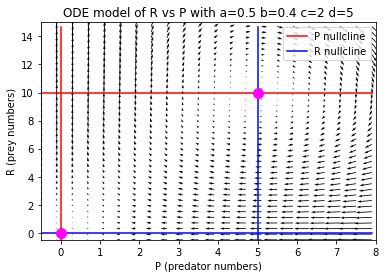

In [5]:
#Set model parameters
c=2
d=5
a=0.5
b=0.4

#Set parameters for the phase plane
xmin = -.5
xmax = 8
ymin = -.5
ymax = 15
dx = 0.4 #set the size of the x-step on the grid
dy = 0.4 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx) # vector of X variables
Y = np.arange(ymin, ymax, dy) # vector of Y variables
x, y = np.meshgrid(X, Y)  #create a grid
    
dXY = ODE_fun([x,y], 0, a, b, c, d) #define dx and dy based off our ODEs

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
ax.quiver(x, y, dXY[0], dXY[1])
plt.xlim(xmin,xmax)
plt.ylim(ymin, ymax)

# create nullclines
Pnull1 = np.repeat(0, len(Y)) #First nullcline for predators: P = 0
plt.plot(Pnull1, Y, 'r', label = 'P nullcline') 
Pnull2 = np.repeat(d/a, len(X)) #Second nullcine for predators: R = d/a
plt.plot(X, Pnull2, 'r') 

Rnull1 = np.repeat(0, len(X)) #First nullcline for prey: R = 0
plt.plot(X, Rnull1, 'b', label = 'R nullcline') 
Rnull2 = np.repeat(c/b, len(Y)) #Second nullcine for prey: P = c/b
plt.plot(Rnull2, Y, 'b') 


# define the fixed point vectors
Xfp = [0, c/b]
Yfp = [0 ,d/a]


# plot the fixed points as large circles
plt.plot(Xfp, Yfp, color = "magenta", marker = "o", linestyle = 'None', markersize = 10.0)

plt.xlabel('P (predator numbers)') 
plt.ylabel('R (prey numbers)')
plt.title('ODE model of R vs P with a=' +str(a)+' b='+str(b) + ' c='+str(c)+' d='+str(d) )
plt.legend()
plt.show()

### 1.3. 
Create a function based on a similar function from lab 6 part 2, that does the following:

 * INPUTS: P and R limits of the phase plane, grid spacing for P and R, parameters of L-V model, Tmax, dt, vector of x initial values, vector of y initial values
 * DO: 
     - create a phase portrait of the 2-variable ODE
     - draw nulllclines and fixed points as you did in question 2
     - overlay solution trajectories starting from given initial values over the phase plane (by calling the ODE defining function you created in question 1)
 * OUTPUT: No variables to return

Choose P and R limits for the phase portrait to include all of the fixed points you found, and generate several (2-4) solutions to illustrate the dynamics. Use the function you created with the following parameter values:

    a) c=2; d=5; a=0.5; b=0.4
    b) c=10; d=5; a=0.5; b=0.4


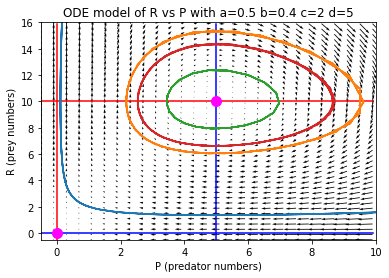

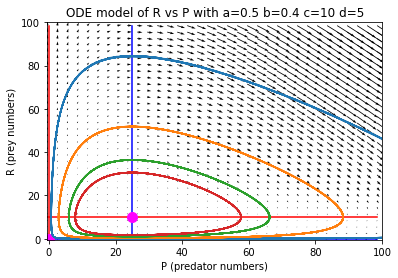

In [6]:
def ode_func_2 (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init):
    #Make phase plane
    X = np.arange(xmin, xmax, dx) # vector of X variables
    Y = np.arange(ymin, ymax, dy) # vector of Y variables
    x, y = np.meshgrid(X, Y)  #create a grid
    dXY = ODE_fun([x,y], 0, a, b, c, d) #define dx and dy based off our ODEs
    #Then plot the arrows given by arrays dx,dy at points x,y:
    fig, ax = plt.subplots()
    ax.quiver(x, y, dXY[0], dXY[1])
    plt.xlim(xmin,xmax)
    plt.ylim(ymin, ymax)
    
    # create nullclines
    Pnull1 = np.repeat(0, len(Y)) #First nullcline for predators: P = 0
    plt.plot(Pnull1, Y, 'r') 
    Pnull2 = np.repeat(d/a, len(X)) #Second nullcine for predators: R = d/a
    plt.plot(X, Pnull2, 'r') 
    Rnull1 = np.repeat(0, len(X)) #First nullcline for prey: R = 0
    plt.plot(X, Rnull1, 'b') 
    Rnull2 = np.repeat(c/b, len(Y)) #Second nullcine for prey: P = c/b
    plt.plot(Rnull2, Y, 'b') 
    
    # define the fixed point vectors
    Xfp = [0, c/b]
    Yfp = [0 ,d/a]
    # plot the fixed points as large circles
    plt.plot(Xfp, Yfp, color = "magenta", marker = "o", linestyle = 'None', markersize = 10.0)

    #Plot solutions
    for j in np.arange(len(x_init)):
        init = [x_init[j], y_init[j]] #[intial x, initial y]
        t = np.linspace(0, Tmax, dt) # create time vector 
        sol = odeint(ODE_fun, init, t, args=(a, b, c, d)) # calculate numeric solution of ODE defined in fun
        # Plot the solution
        plt.plot(sol[:,0], sol[:,1])    
    
    plt.xlabel('P (predator numbers)') 
    plt.ylabel('R (prey numbers)')
    plt.title('ODE model of R vs P with a=' +str(a)+' b='+str(b) + ' c='+str(c)+' d='+str(d) )
    plt.show()
    return

#A) Using parameters c=2; d=5; a=0.5; b=0.4
#Parameters
c = 2
d = 5
a = .5
b = .4

#Set parameters for the phase plane
xmin = -.5
xmax = 10
ymin = -.5
ymax = 16
dx = 0.4 #set the size of the x-step on the grid
dy = 0.4 #set the size of the y-step on the grid

#Time parameters
Tmax = 10
dt = 101

#Initial value arrays
x_init = [1, 3, 6, 8] #Initial predator array
y_init = [2, 14, 12, 8] #Initial prey array

ode_func_2 (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init)


#B) Using parameters c=10; d=5; a=0.5; b=0.4
#Parameters
c = 10
d = 5
a = .5
b = .4

#Set parameters for the phase plane
xmin = -.5
xmax = 100
ymin = -.5
ymax = 100
dx = 3 #set the size of the x-step on the grid
dy = 3 #set the size of the y-step on the grid

#Time parameters
Tmax = 10
dt = 1000

ode_func_2 (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init)

### 1.4 
Use the Jacobian function from question 1 to calculate the eigenvalues of each fixed point with parameter sets a) and b) from question 3 and classify the local dynamics around each one.

In [7]:
#Parameter set A)
c = 2
d = 5
a = .5
b = .4

Xfp = [0, c/b]
Yfp = [0 ,d/a]

print("For  a = " +str(a)+" b = " +str(b) + " c = " +str(c)+" d = "+str(d) )

for i in np.arange(len(Xfp)):
    Jac = ODE_jac([Xfp[i], Yfp[i]], a, b, c, d)
    eVals, eVecs = np.linalg.eig(Jac)
    print("Fixed point ("+str(Xfp[i])+', '+str(Yfp[i])+") eigenvalues: "+str((eVals)))
    
#Parameter set A)
c = 10
d = 5
a = .5
b = .4

Xfp = [0, c/b]
Yfp = [0 ,d/a]

print()
print("For  a = " +str(a)+" b = " +str(b) + " c = " +str(c)+" d = "+str(d) )

for i in np.arange(len(Xfp)):
    Jac = ODE_jac([Xfp[i], Yfp[i]], a, b, c, d)
    eVals, eVecs = np.linalg.eig(Jac)
    print("Fixed point ("+str(Xfp[i])+', '+str(Yfp[i])+") eigenvalues: "+str((eVals)))

For  a = 0.5 b = 0.4 c = 2 d = 5
Fixed point (0, 0) eigenvalues: [-5.  2.]
Fixed point (5.0, 10.0) eigenvalues: [0.+3.16227766j 0.-3.16227766j]

For  a = 0.5 b = 0.4 c = 10 d = 5
Fixed point (0, 0) eigenvalues: [-5. 10.]
Fixed point (25.0, 10.0) eigenvalues: [0.+7.07106781j 0.-7.07106781j]


For both sets of parameters, there is a fixed point at (0,0). This fixed point real eigenvalues with one positive and one negative. Thus, this fixed point is a saddle point. This is evidenced in the phase plane as initial conditions that start near (0,0) approach in the x direction but then diverge away in the y direction.

In both sets of parameters, there is another fixed point. For parameter set A, this occurs at (5.0, 10.0). For parameter set B, this occurs at (25.0, 10.0). In both cases, this fixed point has imaginary eigenvalues with zero real part. This corresponds to a center. In the phase plane, solutions oscillate in "circular" trajectories around the center. 

## Part 2: competition model

Two species (figuratively called sheep and rabbits) occupy the same ecological niche and compete with each other. This is represented by the following model:

$$ 
\frac{dS}{dt} = S(a-S-bR) \\
\frac{dR}{dt} = R(c-R-dS) 
$$


### 2.1 

Calculate the Jacobian matrix for the ODE on paper, keeping the parameters as letters, so that any parameter values can be plugged in. Then define two functions in python to do the following:

    a) the defining function for this ODEs, with the variables as one vector input argument and the parameters as separate inputs, and returns the vector of derivatives as an array
        
    b) the Jacobian matrix for this ODE, with the variables as one vector input argument and the parameters as separate inputs, and returns the Jacobian matrix as a matrix array
      

In [14]:
#Set the ODEs equal to zero and solve for nullclines
#SHEEP NULLCLINES
#dS/dt = 0 = S(a - S - bR)
#S = 0
#a - S - bR = 0    -> S = a - bR

#RABBIT NULLCLINES 
#dR/dt = 0 = R(c - R - dS)
#R = 0
#C - R - dS = 0    -> R = C - dS


#A) Create a defining function for the ODE that returns the vector of derivatives as an array
#The input vector is x. x[0] represents sheep (S) and x[1] represents rabbits (R)
def ODE_fun_comp(x,t,a,b,c,d): # function that defines the ODE
    return [x[0]*(a-x[0]-b*x[1]), 
            x[1]*(c-x[1]-d*x[0])]

#B) Create a function that returns the Jacobian matrix as a matrix array
def ODE_jac_comp(x,a,b,c,d): # function that defines the Jacobian
    return np.array([[a-2*x[0]-b*x[1], -b*x[0] ], 
                     [-d*x[1], c-2*x[1]-d*x[0]]])


### 2.2. 
Calculate the nullclines of the ODE on paper (keeping the parameters as letters so that any parameter values can be plugged in). Write python code to produce vectors for the two variables for each nullcline and plot them over some ranges of R and S that include all intersections between the nullclines. Calculate the values of the fixed points, either using an exact solution on paper, or using a numeric solver as show in the code examples notebook. Add the fixed points using a large point, e.g. using plot at the individual fixed points with options: `color = "magenta", marker = "o", linestyle = 'None', markersize = 10.0`. Use the following parameter values and make plots of the nullclines and fixed points: $a=2; b=1; c=3; d=2$. Self-check: at the intersection of nullclines should be four fixed points, at $(0,0)$, $(3,0)$, $(0,2)$ and $(1,1)$.

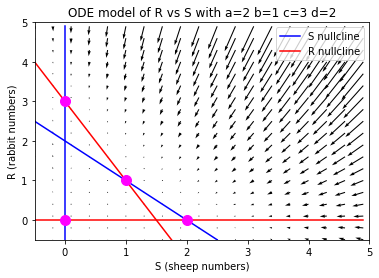

In [33]:
#Set model parameters
a = 2
b = 1
c = 3
d = 2

#Set parameters for the phase plane
xmin = -.5
xmax = 5
ymin = -.5
ymax = 5
dx = 0.3 #set the size of the x-step on the grid
dy = 0.3 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx) # vector of X variables
Y = np.arange(ymin, ymax, dy) # vector of Y variables
x, y = np.meshgrid(X, Y)  #create a grid
    
dXY = ODE_fun_comp([x,y], 0, a, b, c, d) #define dx and dy based off our ODEs

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
ax.quiver(x, y, dXY[0], dXY[1])
plt.xlim(xmin,xmax)
plt.ylim(ymin, ymax)

# create nullclines


Snull1 = np.repeat(0, len(Y)) #First nullcline for sheep: S = 0
plt.plot(Snull1, Y, 'b', label = 'S nullcline') 
Snull2 = a - b*Y #Second nullcine for sheep: S = a - bR
plt.plot(Snull2, Y, 'b') 

Rnull1 = np.repeat(0, len(X)) #First nullcline for rabbits: R = 0
plt.plot(X, Rnull1, 'r', label = 'R nullcline') 
Rnull2 = c - d*X #Second nullcine for rabbits: R = c - dS
plt.plot(X, Rnull2, 'r') 


# define the fixed point vectors
Xfp = [0 ,0, a, (a - b*c)/(1 - b*d)]
Yfp = [0, c, 0, c - d*((a-b*c)/(1 - b*d))]



# plot the fixed points as large circles
plt.plot(Xfp, Yfp, color = "magenta", marker = "o", linestyle = 'None', markersize = 10.0)

plt.xlabel('S (sheep numbers)') 
plt.ylabel('R (rabbit numbers)')
plt.title('ODE model of R vs S with a=' +str(a)+' b='+str(b) + ' c='+str(c)+' d='+str(d) )
plt.legend()
plt.show()

### 2.3. 

Create a function based on a similar function from lab 6 part 2, that does the following:

 * INPUTS: S and R limits of the phase plane, grid spacing for S and R, parameters of the competition model, Tmax, dt, vector of x initial values, vector of y initial values
 * DO: 
     - create a phase portrait of the 2-variable ODE
     - draw nulllclines and fixed points as you did in question 2
     - overlay solution trajectories starting from given initial values over the phase plane (by calling the ODE defining function you created in question 1)
 * OUTPUT: No variables to return

Choose S and R limits for the phase portrait to include all of the fixed points you found, and generate several (2-4) solutions to illustrate the dynamics. Use the function you created with the following parameter values:

       a) a=2; b=1; c=3; d=2
       b) a=2; b=0.5; c=3; d=1
       

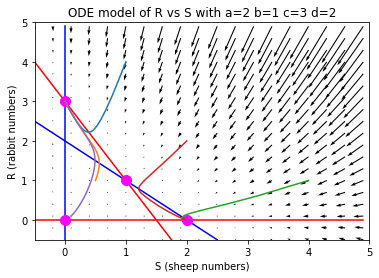

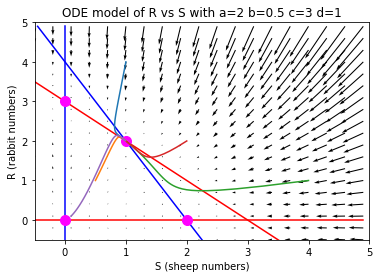

In [36]:
def ode_func_2_comp (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init):
    #Make phase plane
    X = np.arange(xmin, xmax, dx) # vector of X variables
    Y = np.arange(ymin, ymax, dy) # vector of Y variables
    x, y = np.meshgrid(X, Y)  #create a grid
    
    dXY = ODE_fun_comp([x,y], 0, a, b, c, d) #define dx and dy based off our ODEs

    #Then plot the arrows given by arrays dx,dy at points x,y:
    fig, ax = plt.subplots()
    ax.quiver(x, y, dXY[0], dXY[1])
    plt.xlim(xmin,xmax)
    plt.ylim(ymin, ymax)
    
    Snull1 = np.repeat(0, len(Y)) #First nullcline for sheep: S = 0
    plt.plot(Snull1, Y, 'b', label = 'S nullcline') 
    Snull2 = a - b*Y #Second nullcine for sheep: S = a - bR
    plt.plot(Snull2, Y, 'b') 

    Rnull1 = np.repeat(0, len(X)) #First nullcline for rabbits: R = 0
    plt.plot(X, Rnull1, 'r', label = 'R nullcline') 
    Rnull2 = c - d*X #Second nullcine for rabbits: R = c - dS
    plt.plot(X, Rnull2, 'r') 


    # define the fixed point vectors
    Xfp = [0 ,0, a, (a - b*c)/(1 - b*d)]
    Yfp = [0, c, 0, c - d*((a-b*c)/(1 - b*d))]

    # plot the fixed points as large circles
    plt.plot(Xfp, Yfp, color = "magenta", marker = "o", linestyle = 'None', markersize = 10.0)

    #Plot solutions
    for j in np.arange(len(x_init)):
        init = [x_init[j], y_init[j]] #[intial x, initial y]
        t = np.linspace(0, Tmax, dt) # create time vector 
        sol = odeint(ODE_fun_comp, init, t, args=(a, b, c, d)) # calculate numeric solution of ODE defined in fun
        # Plot the solution
        plt.plot(sol[:,0], sol[:,1])    
    
    plt.xlabel('S (sheep numbers)') 
    plt.ylabel('R (rabbit numbers)')
    plt.title('ODE model of R vs S with a=' +str(a)+' b='+str(b) + ' c='+str(c)+' d='+str(d) )
    plt.show()
    return


#A) Using parameters  a=2; b=1; c=3; d=2
#Parameters
a = 2
b = 1
c = 3
d = 2

#Set parameters for the phase plane
xmin = -.5
xmax = 5
ymin = -.5
ymax = 5
dx = 0.3 #set the size of the x-step on the grid
dy = 0.3 #set the size of the y-step on the grid

#Time parameters
Tmax = 10
dt = 100

#Initial value arrays
x_init = [1, .5, 4, 2, .1] #Initial rabbit array
y_init = [4, 1, 1, 2, .1] #Initial sheep array

ode_func_2_comp (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init)


#B) Using parameters  a=2; b=0.5; c=3; d=1
#Parameters
a = 2
b = .5
c = 3
d = 1

#Set parameters for the phase plane
xmin = -.5
xmax = 5
ymin = -.5
ymax = 5
dx = 0.3 #set the size of the x-step on the grid
dy = 0.3 #set the size of the y-step on the grid

#Time parameters
Tmax = 10
dt = 100

#Initial value arrays
x_init = [1, .5, 4, 2, .1] #Initial rabbit array
y_init = [4, 1, 1, 2, .1] #Initial sheep array

ode_func_2_comp (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init)

2.4 Use the Jacobian function to calculate the eigenvalues of each fixed point with parameter values a) and b); classify the local dynamics around one.

In [37]:
#Parameter set A)
a = 2
b = 1
c = 3
d = 2

Xfp = [0 ,0, a, (a - b*c)/(1 - b*d)]
Yfp = [0, c, 0, c - d*((a-b*c)/(1 - b*d))]

print("For  a = " +str(a)+" b = " +str(b) + " c = " +str(c)+" d = "+str(d) )

for i in np.arange(len(Xfp)):
    Jac = ODE_jac_comp([Xfp[i], Yfp[i]], a, b, c, d)
    eVals, eVecs = np.linalg.eig(Jac)
    print("Fixed point ("+str(Xfp[i])+', '+str(Yfp[i])+") eigenvalues: "+str((eVals)))
    
    
#Parameter set B)
a = 2
b = .5
c = 3
d = 1

Xfp = [0 ,0, a, (a - b*c)/(1 - b*d)]
Yfp = [0, c, 0, c - d*((a-b*c)/(1 - b*d))]

print()
print("For  a = " +str(a)+" b = " +str(b) + " c = " +str(c)+" d = "+str(d) )

for i in np.arange(len(Xfp)):
    Jac = ODE_jac_comp([Xfp[i], Yfp[i]], a, b, c, d)
    eVals, eVecs = np.linalg.eig(Jac)
    print("Fixed point ("+str(Xfp[i])+', '+str(Yfp[i])+") eigenvalues: "+str((eVals)))

For  a = 2 b = 1 c = 3 d = 2
Fixed point (0, 0) eigenvalues: [2. 3.]
Fixed point (0, 3) eigenvalues: [-3. -1.]
Fixed point (2, 0) eigenvalues: [-2. -1.]
Fixed point (1.0, 1.0) eigenvalues: [ 0.41421356 -2.41421356]

For  a = 2 b = 0.5 c = 3 d = 1
Fixed point (0, 0) eigenvalues: [2. 3.]
Fixed point (0, 3) eigenvalues: [-3.   0.5]
Fixed point (2, 0) eigenvalues: [-2.  1.]
Fixed point (1.0, 2.0) eigenvalues: [-0.38196601 -2.61803399]


For the first set of parameters, a = 2 b = 1 c = 3 d = 2:
There are four fixed points. Fixed point (0,0) is an unstable node because it has two positive, real eigenvalues. Fixed points (0,3) and (2,0) are both stable nodes because they have both negative, real eigenvalues. Thus, in this senario, populations of rabbits and sheep will converge to one of the two stable fixed points and remain there, depending on the initial conditions (as long as the initial conditions do not fall on other fixed points). The fixed point at (1,1) is a saddle point and is not stable, due to having one positive and one negative real eigenvalue. 

For the second set of parameters, a = 2 b = 0.5 c = 3 d = 1:
There is once again four fixed points. Now, there is only one stable fixed pint at (1,2). All populations of rabbits and sheep converge here from initial conditions that do not fall on other fixed points. There are two saddle points at (0,3) and (2,0); as saddle points, neither are stable. There is an unstable node at (0,0). 

## Part 3: Fitzhugh-Nagumo model


We learned about limit cycles, which are isolated closed orbits in the phase plane. The Poincare-Bendixson (PB) theorem states that "a region of the plane which contains a single unstable fixed point, and for which the direction of the flow everywhere on the boundary is inward, must contain a limit cycle." We will see an example of this behavior in the Fitzhugh-Nagumo ODE.

The FHN model has only two variables, which allows us to graph the system in the phase plane and to visualize its properties. It is a drastic simplification of the more realistic Hodgkin-Huxley equations, which has four variables with an equal number of equations. While it gives up biological realism, it still captures many of the dynamics of an action potential.  The FHN model is described by the following two ODEs:

$$\frac{dV}{dt} = V(a-V)(V-1) - w + I \\
  \frac{dw}{dt} = bV - cw $$


 * $V$ mimics the membrane voltage
 * $w$ mimics the outward current; sometimes called the recovery variable
 * $a$ determines the shape of the cubic nullcline
 * $b$ and $c$  determine the kinetics of $w$ ($b>0, c \geq 0$)
 * $I$ is the injection current.




3.1 Calculate the Jacobian matrix for the ODE on paper, keeping the parameters as letters, so that any parameter values can be plugged in. Then define functions in python to do the following:

      a) the ODE function for this ODEs, with the variables as one vector input argument and the parameters as separate inputs, and returns the vector of derivatives as an array
      b) the Jacobian matrix for this ODE, with the variables as one vector input argument and the parameters as separate inputs, and returns the Jacobian matrix as a matrix array
       

In [24]:
#V is x[0] and w is x[1]
def ODE_fun_FN(x,t,a,b,c,I): # function that defines the ODE
    return [x[0]*(a - x[0])*(x[0] - 1) - x[1] + I, 
            b*x[0] - c*x[1]]

def ODE_jac_FN(x,a,b,c,I): # function that defines the Jacobian
    return np.array([[-2*x[0]**2 + 2*x[0] + 2*a*x[0] - a, -1], 
                     [b, -c]])

### 3.2. 

Calculate the nullclines of the ODE on paper (keeping the parameters as letters so that any parameter values can be plugged in). Write python code to produce vectors for the two variables for each nullcline and plot them over some ranges of V and W that include all intersections between the nullclines. Calculate the values of the fixed points and add them to the plot. 

Create a function based on a similar function from lab 6 part 2, that does the following:

 * INPUTS: V and W limits of the phase plane, parameters of the competition model, Tmax, dt, vector of x initial values, vector of y initial values
 * DO: 
     - create a phase portrait of the 2-variable ODE
     - draw the V and W nulllclines 
     - overlay solution trajectories starting from given initial values over the phase plane (by calling the ODE defining function you created in question 1)
 * OUTPUT: No variables to return


Use the following parameter values and make plots of the nullclines and fixed points: $a=4; b=5; c=1; I=0$. Self-check: there should be only one fixed point at $(0,0)$ for these parameter values.


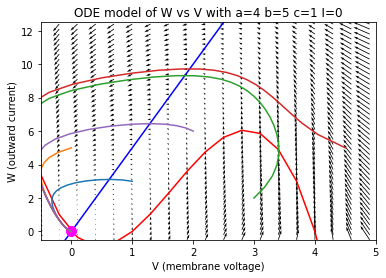

In [54]:
def null_func(x, a, b, c, I): #Function of nullclines
    return [x[0]*(a-x[0])*(x[0]-1)-x[1]+I, # equation for the first nullcline
           b*x[0] - c*x[1]] # equation for the second nullcline



def ode_func_2_FN (a, b, c, I, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init):
    X = np.arange(xmin, xmax, dx) # vector of X variables
    Y = np.arange(ymin, ymax, dy) # vector of Y variables
    x, y = np.meshgrid(X, Y)  #create a grid
    
    dXY = ODE_fun_FN([x,y], 0, a, b, c, I) #define dx and dy based off our ODEs

    #Then plot the arrows given by arrays dx,dy at points x,y:
    fig, ax = plt.subplots()
    ax.quiver(x, y, dXY[0], dXY[1])
    plt.xlim(xmin,xmax)
    plt.ylim(ymin, ymax)

    # create nullclines
    Vnull1 = X*(a-X)*(X-1) + I #First nullcline for V: W = V(a-V)(V-1) + I
    plt.plot(X, Vnull1, 'r') 

    Wnull1 = (b/c)*X #First nullcline for W: W = (b/c)*V
    plt.plot(X, Wnull1, 'b') 

    #Solve and plot fixed point
    root = fsolve(null_func, x0=[0.5,0.5], args= (a,b,c,I))
    Xfp = [root[0]]
    Yfp = [root[1]]
    # plot the fixed points as large circles
    plt.plot(Xfp, Yfp, color = "magenta", marker = "o", linestyle = 'None', markersize = 10.0)

    #Plot solutions
    for j in np.arange(len(x_init)):
        init = [x_init[j], y_init[j]] #[intial x, initial y]
        t = np.linspace(0, Tmax, dt) # create time vector 
        sol = odeint(ODE_fun_FN, init, t, args=(a, b, c, I)) # calculate numeric solution of ODE defined in fun
        # Plot the solution
        plt.plot(sol[:,0], sol[:,1])    
    
    plt.xlabel('V (membrane voltage)') 
    plt.ylabel('W (outward current)')
    plt.title('ODE model of W vs V with a=' +str(a)+' b='+str(b) + ' c='+str(c)+' I='+str(I) )
    plt.show()
    return

#Set model parameters
a = 4
b = 5
c = 1
I = 0

#Set parameters for the phase plane
xmin = -.5
xmax = 5
ymin = -.5
ymax = 12.5
dx = 0.3 #set the size of the x-step on the grid
dy = 0.3 #set the size of the y-step on the grid

#Time parameters
Tmax = 10
dt = 200

#Initial value arrays
x_init = [1, 0, 3, 4.5, 2] #Initial rabbit array
y_init = [3, 5, 2, 5, 6] #Initial sheep array

ode_func_2_FN (a, b, c, I, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init)

3.3. Use the same code as above, and the same values of parameters $a,b,c$, increase the value of applied current $I$ until you observe oscillations. Make a plot of the resulting phase plane and solutions
       

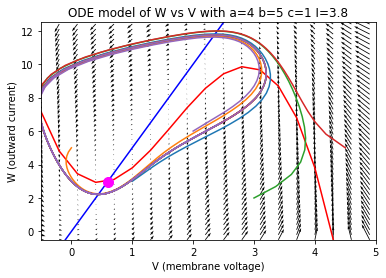

In [89]:
#Set model parameters
a = 4
b = 5
c = 1

#Values of I
I = 3.8

ode_func_2_FN (a, b, c, I, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init)

We start to observe oscillations around I = 3.8. 

### 3.4 

Use the Jacobian function from quesion 1 to calculate the eigenvalues of the fixed point for one value of $I$ below the oscillation threshold and one value above, and compare their classification. Note that for $I>0$ it is very hard to calculate the fixed point by hand, so please create a nullcline function and use the numeric solver `fsolve` as shown in the code example notebook.

In [92]:
#Value of I below threshold
I = 0

def null_func(x, a, b, c, I):
    return [x[0]*(a-x[0])*(x[0]-1)-x[1]+I, # equation for the first nullcline
           b*x[0] - c*x[1]] # equation for the second nullcline

root = fsolve(null_func, x0=[0.5,0.5], args= (a,b,c,I))
Xfp = [root[0]]
Yfp = [root[1]]

print("For I = " + str(I))
for i in np.arange(len(Xfp)):
    Jac = ODE_jac_FN([Xfp[i], Yfp[i]], a, b, c, I)
    eVals, eVecs = np.linalg.eig(Jac)
    print("Fixed point ("+str(Xfp[i])+', '+str(Yfp[i])+") eigenvalues: "+str((eVals)))

#Value of I above threshold
I = 3.7

def null_func(x, a, b, c, I):
    return [x[0]*(a-x[0])*(x[0]-1)-x[1]+I, # equation for the first nullcline
           b*x[0] - c*x[1]] # equation for the second nullcline

root = fsolve(null_func, x0=[0.5,0.5], args= (a,b,c,I))
Xfp = [root[0]]
Yfp = [root[1]]

print("For I = " + str(I))
for i in np.arange(len(Xfp)):
    Jac = ODE_jac_FN([Xfp[i], Yfp[i]], a, b, c, I)
    eVals, eVecs = np.linalg.eig(Jac)
    print("Fixed point ("+str(Xfp[i])+', '+str(Yfp[i])+") eigenvalues: "+str((eVals)))


For I = 0
Fixed point (0.0, 0.0) eigenvalues: [-2.5+1.6583124j -2.5-1.6583124j]
For I = 3.7
Fixed point (0.5721808870211924, 2.8609044351059616) eigenvalues: [0.03351347+1.98288928j 0.03351347-1.98288928j]


When I is below the oscillation threshold, we see that there is a single fixed point with complex eigenvalues with negative real part. This represents a stable spiral. Solutions from all initial conditions spiral in to the fixed point. 

When I reaches a threshold around I = 3.8, the eigenvalues for the fixed point are now complex with positive real part. Thus, the fixed point represents an unstable spiral. However, due to the phase plane, the flow of solutions is "trapped" (flow is limited from diverging too far in any direction). By the Poincare Bendixson Theorem, because the phase plane contains no stable fixed points (here, one unstable fixed point) and has this region where flow is trapped, the solutions follow isolated, closed orbits over time. 